# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Sayed Muzammil
- **Email:** smuzammil87@gmail.com
- **ID Dicoding:** sayed_muzammil_tkog

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Tahun mana yang paling banyak rental?
- Pertanyaan 2 : Pada season apa orang banyak melakukan rental?

## Import Semua Packages/Library yang Digunakan

In [48]:
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com

34.23.114.227


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [21]:
day_df = pd.read_csv("day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

**Menilai** data **day_df**

In [23]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [24]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0


In [25]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [26]:
day_df.nunique()


instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

### Cleaning Data

**Memperbaiki** tipe data **dteday**

In [57]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [34]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore day_df

In [35]:
day_df.describe(include="all")


<ipython-input-35-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Mempersiapkan data per tahun

In [47]:
day_df.groupby(by="dteday").agg({
    "registered": ["max", "min", "mean", "std"]
})

registered                  
                  max   min    mean std
dteday                                 
2011-01-01        654   654   654.0 NaN
2011-01-02        670   670   670.0 NaN
2011-01-03       1229  1229  1229.0 NaN
2011-01-04       1454  1454  1454.0 NaN
2011-01-05       1518  1518  1518.0 NaN
...               ...   ...     ...  ..
2012-12-27       1867  1867  1867.0 NaN
2012-12-28       2451  2451  2451.0 NaN
2012-12-29       1182  1182  1182.0 NaN
2012-12-30       1432  1432  1432.0 NaN
2012-12-31       2290  2290  2290.0 NaN

[731 rows x 4 columns]

Mempersiapkan data per Season

In [70]:
day_df.groupby(by="season").agg({
    "registered": ["max", "min", "mean", "std"]
})

registered                               
              max  min         mean          std
season                                          
1            5315  416  2269.204420  1200.269751
2            6456  674  3886.233696  1353.375628
3            6917  889  4441.691489  1304.626949
4            6946   20  3999.050562  1444.782557

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tahun mana yang paling banyak rental?

In [71]:
yearly_rental_df = day_df.resample(rule='Y', on='dteday').agg({
    "registered": "sum"
})

yearly_rental_df.index = yearly_rental_df.index.strftime('%Y') #mengubah format order date menjadi Tahun-Bulan
yearly_rental_df = yearly_rental_df.reset_index()
yearly_rental_df.rename(columns={
    "dteday": "Tahun",
    "registered": "Total_peserta"
}, inplace=True)
yearly_rental_df.head()

,Tahun,Total_peserta
0,2011,995851
1,2012,1676811


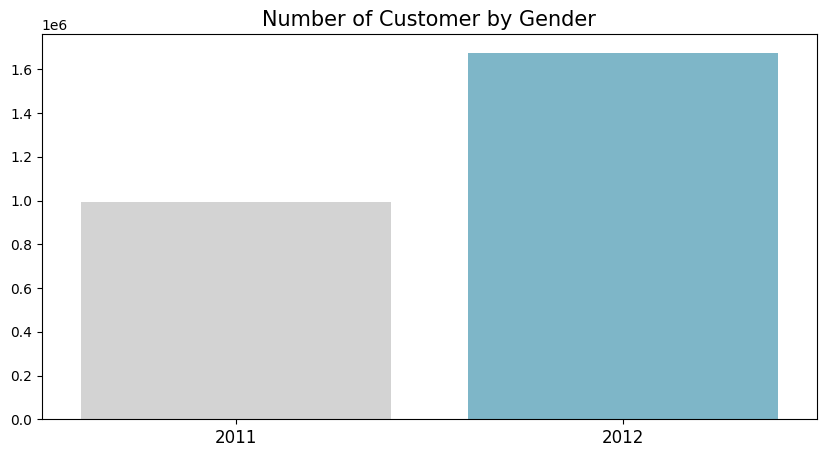

In [73]:
plt.figure(figsize=(10, 5))
colors = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]


sns.barplot(
    y="Total_peserta",
    x="Tahun",
    data=yearly_rental_df.sort_values(by="Tahun", ascending=True),
    palette=colors
)
plt.title("Jumlah customer per Tahun", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Pada season apa orang banyak melakukan rental?

In [90]:
season_rental_df = day_df.groupby("season").registered.sum().sort_values(ascending=False).reset_index()

season_rental_df.rename(columns={
    "registered": "Total_peserta"
}, inplace=True)
season_rental_df.head()


,season,Total_peserta
0,3,835038
1,2,715067
2,4,711831
3,1,410726


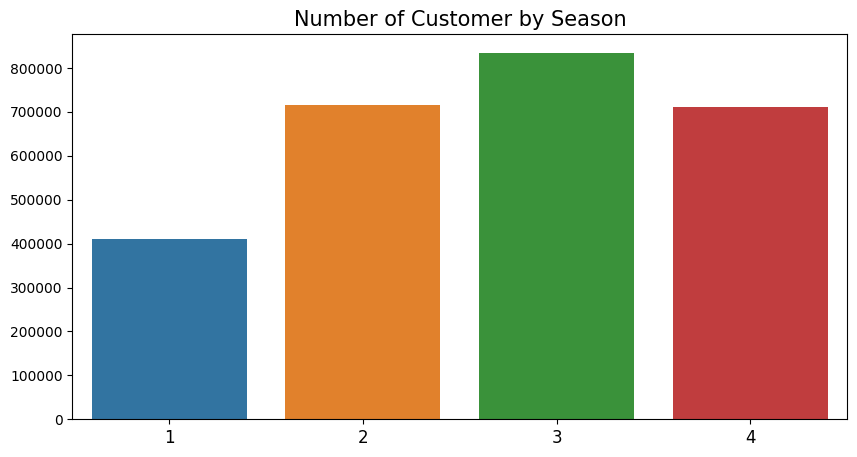

In [94]:
plt.figure(figsize=(10, 5))


sns.barplot(
    y="Total_peserta",
    x="season",
    data=season_rental_df.sort_values(by="season", ascending=True),
)
plt.title("Jumlah customer per Tahun", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Lebih banyak jumlah rental di tahun 2012

- Conclution pertanyaan 2 : Lebih banyak jumlah rental di season 3 (fall)